In [1]:
import gsidiag as gd

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from gsidiag.datasources import getVarInfo # NEW !!!!

%matplotlib inline

['2024020600', '2024020606', '2024020612', '2024020618', '2024020700', '2024020706', '2024020712', '2024020718', '2024020800', '2024020806', '2024020812', '2024020818']

---------->>> varType :  n19

['/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024020600/diag_amsua_n19_01.2024020600', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024020606/diag_amsua_n19_01.2024020606', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024020612/diag_amsua_n19_01.2024020612', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024020618/diag_amsua_n19_01.2024020618', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024020700/diag_amsua_n19_01.2024020700', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024020706/diag_amsua_n19_01.2024020706', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024020712/diag_amsua_n19_01.2024020712', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024020718/diag_amsua_n19_01.2024020718', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024020800/diag_amsua_

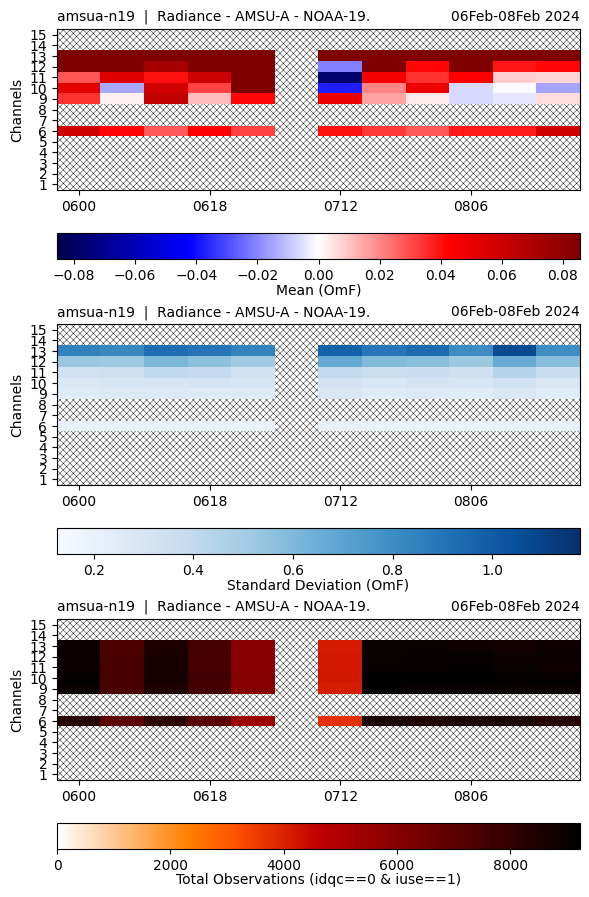

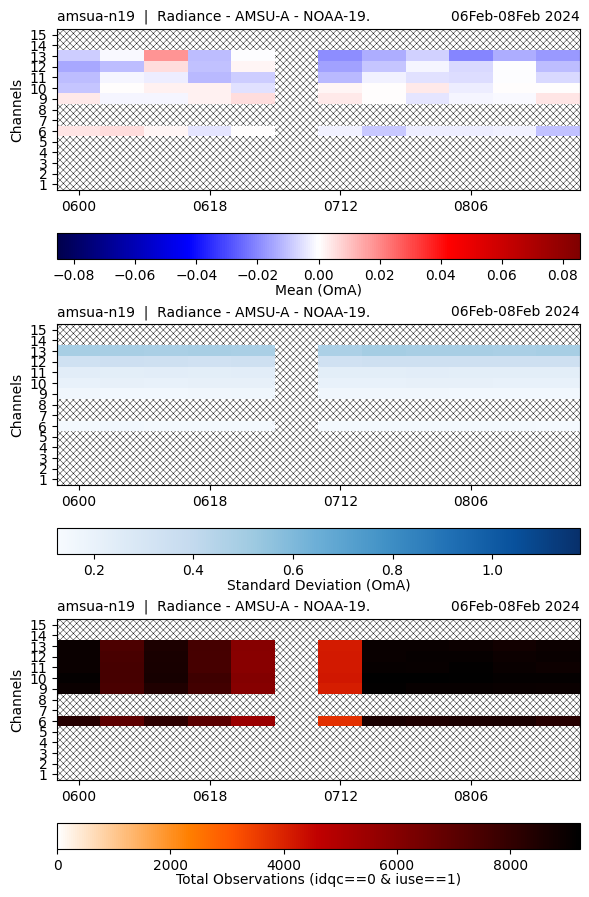

In [2]:
# Rodada do Experimento 19 (Fazer 1ª rodada para FEV e 2ª rodada para MAR)
DIRdiag = '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout'
# Rodada do Experimento 20 (Fazer rodada para FEV)
# DIRdiag = '/home/radiancia/Exp_SMNA/data/EXP20/gsi_dataout'
# Rodada do Experimento 21 (Fazer rodada para MAR)
# DIRdiag = '/home/radiancia/Exp_SMNA/data/EXP21/gsi_dataout'

varTypes = ['n15', 'n18', 'n19']#, 'metop-b']
varName = 'amsua'
dateIni = '2024020600' 
dateFin = '2024020818' 
nHour = '6'          
vminOMA = -1.0       
vmaxOMA = 1.0        
vminSTD = 0.0        
vmaxSTD = 1.0       
Level = 1000
Lay = 15           
SingleL = 'OneL' 

datei = datetime.strptime(str(dateIni), '%Y%m%d%H')
datef = datetime.strptime(str(dateFin), '%Y%m%d%H')
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq='6H').tolist()]

print(dates)
print('')

for nvT in range(len(varTypes)):
    varType = varTypes[nvT]
    print("---------->>> varType : ", varType)
    print('')
    
    # Caminhos dos arquivos diagnósticos
    paths, pathsc = [], []
    
    OuterL = '01'        
    [paths.append(DIRdiag + '/' + dt + '/diag_' + varName +'_'+ varType +'_' + OuterL + '.' + dt) for dt in dates]
    
    OuterLc = '03'
    [pathsc.append(DIRdiag + '/' + dt + '/diag_' + varName +'_'+ varType +'_' + OuterLc + '.' + dt) for dt in dates]

    print(paths)
    print('')
    print(pathsc)
    
    
    # Leitura dos arquivos de diagnósticos
    read = True
    
    if read:
        gdf_list = []
        print('')
    
        print('Aguarde, o tempo total estimado para a leitura dos arquivos é de ' +
          str(int((float(len(paths))*20)/60)) + ' minutos e ' +
          str(int((float(len(paths))*20)%60)) + ' segundos.')
    
        print('')
    
        for path, pathc in zip(paths, pathsc):
            print('Reading ' + path)
            
            gdf = gd.read_diag(path, pathc)
            
            gdf_list.append(gdf)
        
        print('Leitura arquivos: Pronto!')
        print('')
    
    
    # PLOTES da Distribuição Espacial
    print("***** DISTRIBUIÇÃO ESPACIAL *****")
    print('')
    
    param = 'imp'
    channels = list(map(int,gdf_list[0].obsInfo[varName].loc[varType].nchan.unique())) 
    minVal = None
    maxVal = None
    numer = range(len(dates))
    print('Numero de datas: ', numer)
    print('channels:',channels)
    print('param:',param)
    print('')
    
    for nc in range(len(channels)):
        nchan = channels[nc]
        print('Para nchan = ',nchan)
        
        ###################################### NEW ########################################################
        forplot = 'Channel ='+str(nchan)
        varInfo = getVarInfo(varType, varName, 'instrument')
        if varInfo is not None:
            instrument_title = varInfo
        else:
            instrument_title = str(varName) + '-' + str(varType) + '  |  ' + 'Unknown instrument'
        #################################################################################################
        
        for i in range(len(dates)):
            tidx = i
            print('')
            print('>> Dist. espacial - Gerando as figuras para a data',dates[i])
    
#             mask2 = "(nchan=="+str(nchan)+" & iuse==1) & (idqc==0.0)"   
            print("Plotando para a variavel: ", varName, "Tipo: ", varType, 'Canal:', nchan, 'Param:', param)
            gd.plot_diag.plot(gdf_list[tidx], 
                              varName=varName, 
                              varType=varType, 
                              param=param, 
                              mask="(nchan=="+str(nchan)+" & iuse==1) & (idqc==0.0)", 
                              markersize=4.80, 
                              legend='true')
            ###################################### NEW ########################################################
            datefmt = dates[i]#.strftime("%Y%m%d%H")
            date = datetime.strptime(str(datefmt), "%Y%m%d%H")
            date_title = str(date.strftime("%d%b%Y - %H%M")) + ' GMT'
            plt.title(date_title, loc='right', fontsize=10)
            plt.title(instrument_title, loc='left', fontsize=9)
            plt.annotate(forplot, xy=(0.45, 1.015), xytext=(0, 0), xycoords='axes fraction', textcoords='offset points', 
                         color='gray', fontweight='bold', fontsize='10',horizontalalignment='left', verticalalignment='center')
            #################################################################################################
            figname=varName+"_"+str(varType)+"_"+param+"_"+"CH"+str(nchan)+"_"+dates[i]+"_"+"plot.png"
            plt.tight_layout()
            plt.savefig(figname)
            plt.close()
            print('')
        
        print('>> STATCOUNT - Gerando as figuras para o canal:',nchan)
        channel=nchan
        print('channel =', channel)
        gd.plot_diag.statcount(gdf_list, 
                               varName=varName, 
                               varType=varType, 
                               noiqc=False, 
                               dateIni=dateIni, 
                               dateFin=dateFin, 
                               nHour=nHour, 
                               channel=channel, 
                               figTS=True, 
                               figMap=True, 
                               markersize=4.80)
        plt.close()
        print('')
    
    
    # Série Temporal Radiância
    print("***** SÉRIE TEMPORAL *****")
    print('')
    
    nchan = 13
    vminOMA = -1
    vmaxOMA = 1
    vminSTD = 0 
    vmaxSTD = 1
    print('>> Para um canal: varName=',varName,'varType=',varType,'nchan=',nchan)
    gd.plot_diag.time_series_radi(gdf_list,
                             varName=varName, 
                             varType=varType, 
                             mask='idqc==0 & iuse==1', 
                             dateIni=dateIni, 
                             dateFin=dateFin, 
                             nHour=nHour, 
                             vminOMA=vminOMA, 
                             vmaxOMA=vmaxOMA, 
                             vminSTD=vminSTD, 
                             vmaxSTD=vmaxSTD, 
                             channel=nchan, 
                             Clean=False)
    
    print('')
    
    nchan   = None   # todos os canais
    vminOMA = None
    vmaxOMA = None
    vminSTD = None 
    vmaxSTD = None
    
    print('>> Todos os canais: varName=',varName,'varType=',varType,'nchan=',nchan)
    gd.plot_diag.time_series_radi(gdf_list,
                             varName=varName, 
                             varType=varType, 
                             mask='idqc==0 & iuse==1', 
                             dateIni=dateIni, 
                             dateFin=dateFin, 
                             nHour=nHour, 
                             vminOMA=vminOMA, 
                             vmaxOMA=vmaxOMA, 
                             vminSTD=vminSTD, 
                             vmaxSTD=vmaxSTD, 
                             channel=nchan, 
                             Clean=False)
    
    print('')
    
    # Finalizando: liberando memória para carregar o próximo varTypes (satélite)
    for file in gdf_list:
#         print('file._FNumber = ', file._FNumber)
        if file._FNumber != None:
            file.close()


In [3]:
# from PIL import Image
# import os

# imagens = []
# path = "/home/radiancia/My_readDiag/readDiag-issuefix_27/notebooks/EXP19_figs"

# varType = 'n19'
# nchan = 6
# param = 'imp'

# for i in range(len(dates)):
#     tidx = i
#     new = Image.open(path + '/' + 'amsua_' + varType + '_' + param + '_CH' + str(nchan) + '_'+ dates[i] + '_' + 'plot.png')
#     imagens.append(new)
    
# # Salvar imagem no formato gif contendo todas as imagens do 
# frame_one = imagens[0]
# frame_one.save("amsua_n19_CH6_gif.gif", save_all=True, append_images=imagens, duration=500, loop=0)


# print('Gif criado')

In [4]:
# for file in gdf_list:
#         file.close()

# help("channel")
# gdf_list
# for file in gdf_list:
#     print(file._FNumber)

In [5]:
# - kx: "metop-a"
#     details:
#       - var: amsua
#         abbreviation: radiance
#         instrument: Radiance - AMSU-A - MetOp-A.
#         color: "#2e8e24"
#         symbol: x
#         iuse: "1"
#   - kx: "metop-b"
#     details:
#       - var: amsua
#         abbreviation: radiance
#         instrument: Radiance - AMSU-A - MetOp-B.
#         color: "#2e8e24"
#         symbol: x
#         iuse: "1"
#   - kx: "metop-c"
#     details:
#       - var: amsua
#         abbreviation: radiance
#         instrument: Radiance - AMSU-A